In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("bitcoin.csv")

In [3]:
Data.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2825 non-null   object 
 1   price         2825 non-null   float64
 2   total_volume  2825 non-null   float64
 3   market_cap    2824 non-null   float64
 4   coin_name     2825 non-null   object 
dtypes: float64(3), object(2)
memory usage: 110.5+ KB


In [5]:
Data['date'] = pd.to_datetime(Data['date']).dt.date

In [6]:
Data

,date,price,total_volume,market_cap,coin_name
0,2015-01-01,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
2820,2022-09-22,18539.635238,4.106000e+10,3.551945e+11,bitcoin
2821,2022-09-23,19464.322663,3.766091e+10,3.720756e+11,bitcoin
2822,2022-09-24,19291.904802,3.550614e+10,3.709131e+11,bitcoin
2823,2022-09-25,18939.970580,2.464435e+10,3.631688e+11,bitcoin


(738156.0, 738424.0)

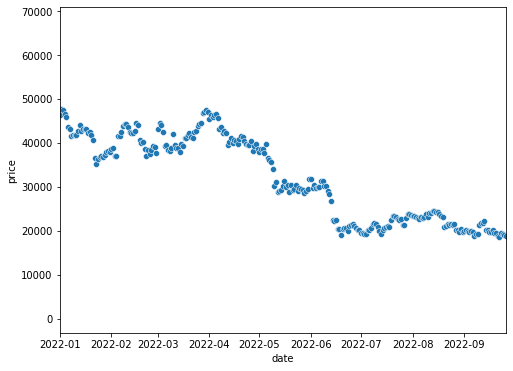

In [7]:
import datetime
plt.figure(figsize=(8,6))
sns.scatterplot(data=Data, x='date', y='price')
plt.xlim([datetime.date(2022, 1, 1), datetime.date(2022, 9, 26)])

In [8]:
# Date on which we saw the max price of Bitcoin
Max_Price = Data['price'].max()
Data.loc[Data['price']==Max_Price]

,date,price,total_volume,market_cap,coin_name
2503,2021-11-09,67617.015545,1.054263e+11,1.278798e+12,bitcoin


In [9]:
Min_Price = Data['price'].min()
Data.loc[Data['price']==Min_Price]

,date,price,total_volume,market_cap,coin_name
13,2015-01-14,172.1479,2.360069e+08,2.362640e+09,bitcoin


In [10]:
data_ewma = Data.drop(columns=['total_volume','market_cap','coin_name'],axis=1)

In [11]:
data_ewma

,date,price
0,2015-01-01,313.992000
1,2015-01-02,314.446000
2,2015-01-03,286.572000
3,2015-01-04,260.936000
4,2015-01-05,273.220000
...,...,...
2820,2022-09-22,18539.635238
2821,2022-09-23,19464.322663
2822,2022-09-24,19291.904802
2823,2022-09-25,18939.970580


In [12]:
X_ewma = data_ewma['price'].ewm(alpha=0.02).mean()

In [13]:
X_ewma

0         313.992000
1         314.221293
2         304.818051
3         293.512883
4         289.288684
            ...     
2820    23020.787153
2821    22949.657863
2822    22876.502802
2823    22797.772157
2824    22718.004943
Name: price, Length: 2825, dtype: float64

In [14]:
data_ewma['ewm'] = X_ewma

In [15]:
data_ewma

,date,price,ewm
0,2015-01-01,313.992000,313.992000
1,2015-01-02,314.446000,314.221293
2,2015-01-03,286.572000,304.818051
3,2015-01-04,260.936000,293.512883
4,2015-01-05,273.220000,289.288684
...,...,...,...
2820,2022-09-22,18539.635238,23020.787153
2821,2022-09-23,19464.322663,22949.657863
2822,2022-09-24,19291.904802,22876.502802
2823,2022-09-25,18939.970580,22797.772157


(738156.0, 738424.0)

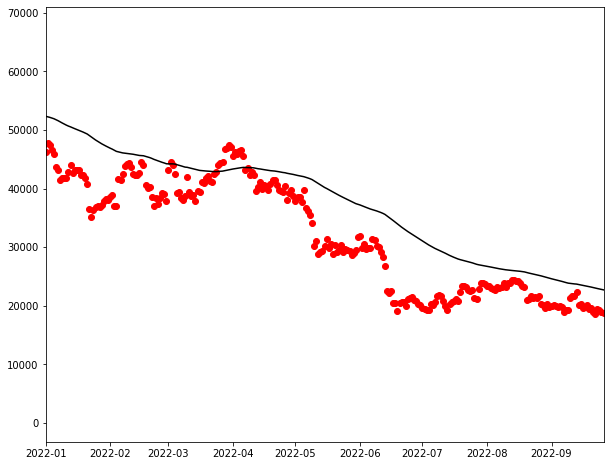

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(data_ewma['date'],data_ewma['price'],color='red')
plt.plot(data_ewma['date'],X_ewma,color='black')
plt.xlim([datetime.date(2022, 1, 1), datetime.date(2022, 9, 26)])